In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

train_df_sars = pd.read_csv(
    "/content/drive/My Drive/Colab Notebooks/covid-19/sars.csv",
    encoding = "utf-8"
)
train_df_covid19 = pd.read_csv(
    "/content/drive/My Drive/Colab Notebooks/covid-19/covid19.csv",
    encoding = "utf-8"
)

In [0]:
def get_x_y_info(train_data_df):
  x = pd.DataFrame({
    'date' : [i for i in range(1, len(train_data_df) + 1)], 
  })
  y = pd.DataFrame(train_data_df['total'])
  return x, y

In [4]:
x_sars, y_sars = get_x_y_info(train_df_sars)
print(x_sars)
print(y_sars)

    date
0      1
1      2
2      3
3      4
4      5
..   ...
90    91
91    92
92    93
93    94
94    95

[95 rows x 1 columns]
    total
0     167
1     219
2     264
3     306
4     350
..    ...
90   8439
91   8436
92   8436
93   8437
94   8437

[95 rows x 1 columns]


In [5]:
x_covid19, y_covid19 = get_x_y_info(train_df_covid19)
print(x_covid19)
print(y_covid19)

    date
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
31    32
32    33
33    34
34    35
35    36
36    37
37    38
38    39
39    40
40    41
41    42
42    43
43    44
44    45
    total
0     282
1     314
2     581
3     846
4    1320
5    2014
6    2798
7    4593
8    6065
9    7818
10   9826
11  11953
12  14557
13  17391
14  20630
15  24554
16  28276
17  31481
18  34886
19  37558
20  40554
21  43103
22  45171
23  46997
24  49053
25  50580
26  51857
27  71429
28  73332
29  75204
30  75748
31  76769
32  77794
33  77794
34  78811
35  79331
36  80239
37  81109
38  82294
39  83652
40  85403
41  87137
42  88948
43  90870
44  93090


In [0]:
# ref: https://kknews.cc/zh-tw/code/zejejqp.html
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

PREDICT_AND_CHECK_ACCURACY = 1
PREDICT_NEXT_FEW_DAYS = 20

def poly_regression(x, y, predict_next_few_days):
  polynomial_features= PolynomialFeatures(degree=2)
  x_poly = polynomial_features.fit_transform(x)

  model = LinearRegression()
  model.fit(x_poly, y)

  x_pre = pd.DataFrame({
      'date' : [i for i in range(1, len(x) + predict_next_few_days)], 
  })
  x_pre_poly = polynomial_features.fit_transform(x_pre)

  y_poly_predict = model.predict(x_pre_poly)
  return x_pre,  y_poly_predict

def poly_regression_accuracy(x, y):
  x, y_pre = poly_regression(x, y, PREDICT_AND_CHECK_ACCURACY)
  rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
  r2 = r2_score(y,y_poly_pred)
  print(rmse)
  print(r2)

def show_plot(x_train, y_train, x_predict, y_predict, title):
  line_actual, = plt.plot(x_train, y_train, color = 'b', label = 'actual')
  line_predict, = plt.plot(x_predict, y_predict, color = 'r', label = 'prediction')
  plt.legend(handles = [line_actual, line_predict])

  plt.title(title)
  plt.xlabel("days")
  plt.ylabel("total")
  plt.show()

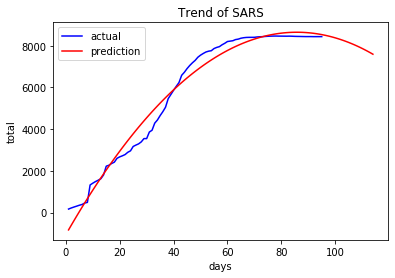

In [7]:
x, y = poly_regression(x_sars, y_sars, PREDICT_NEXT_FEW_DAYS)
show_plot(x_sars, y_sars, x, y, "Trend of SARS")

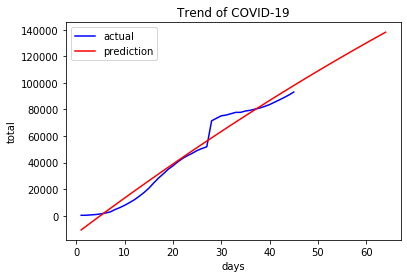

In [8]:
x, y = poly_regression(x_covid19, y_covid19, PREDICT_NEXT_FEW_DAYS)
show_plot(x_covid19, y_covid19, x, y, "Trend of COVID-19")